In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cluster0 = pd.read_excel('/content/CLUSTER 0 HDBSCAN.xlsx')
cluster1 = pd.read_excel('/content/CLUSTER 1 HDBSCAN.xlsx')
cluster2 = pd.read_excel('/content/CLUSTER 2 HDBSCAN.xlsx')
cluster3 = pd.read_excel('/content/CLUSTER 3 HDBSCAN.xlsm')


In [ ]:
def plot_cluster(cluster, coluna):
  plt.figure(figsize=(10,8))
  for pais in cluster['país'].unique():
    pais_df = cluster[cluster['país'] == pais]
    plt.plot(pais_df['date'], pais_df[coluna], label=pais)
  #plt.ylim(0,0.00000001)
  #plt.ylim(0,1000000)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

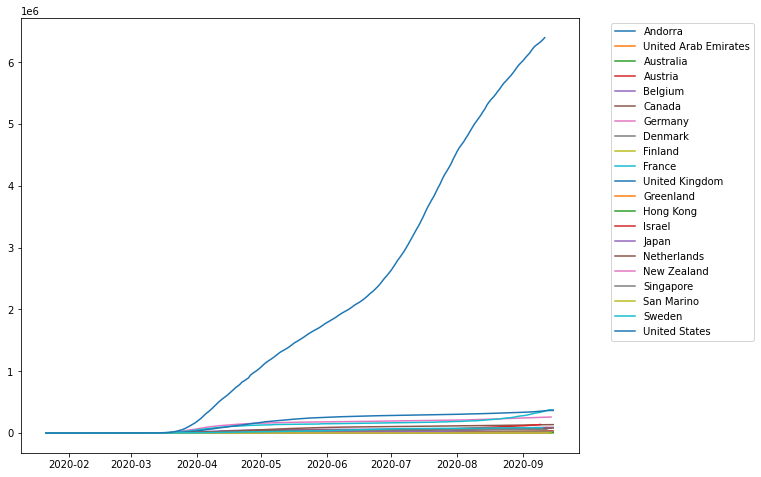

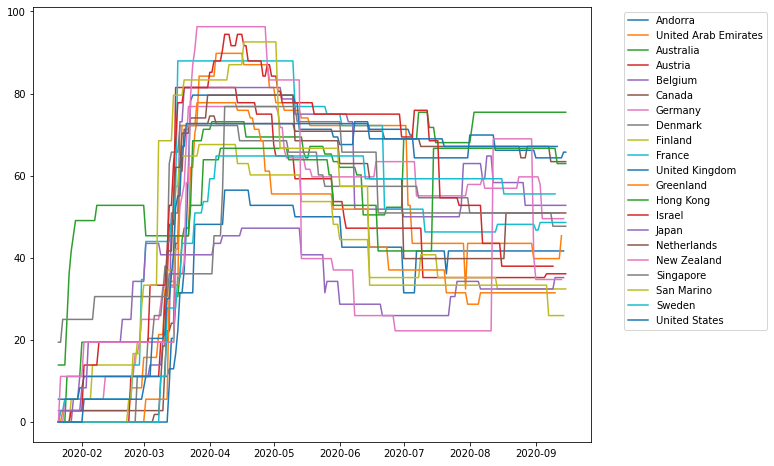

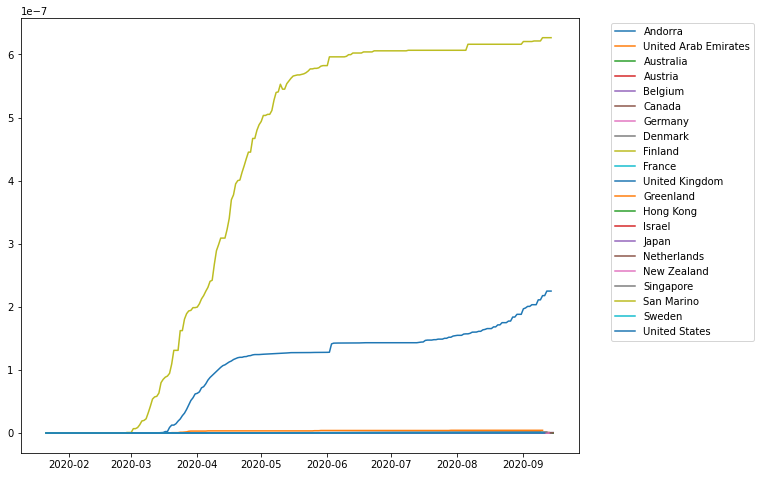

In [ ]:
plot_cluster(cluster0, 'casos_confirmados')
plot_cluster(cluster0, 'stringency_index')
plot_cluster(cluster0, 'casos/populacao')

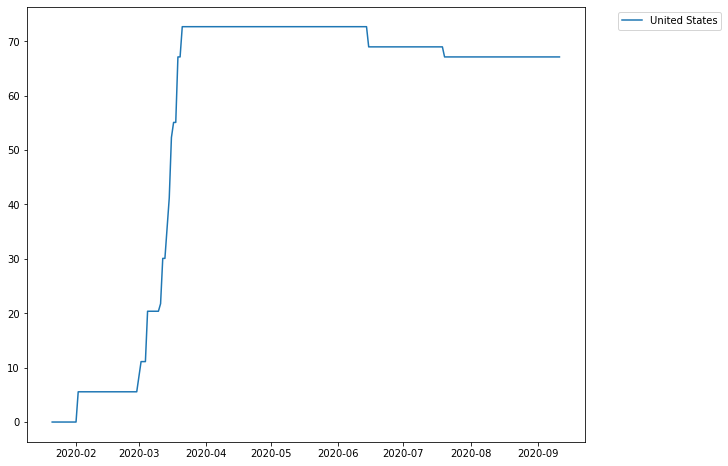

In [ ]:
plt.figure(figsize=(10,8))
pais_df = cluster0[cluster0['país'] == 'United States']
plt.plot(pais_df['date'], pais_df['stringency_index'], label='United States')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

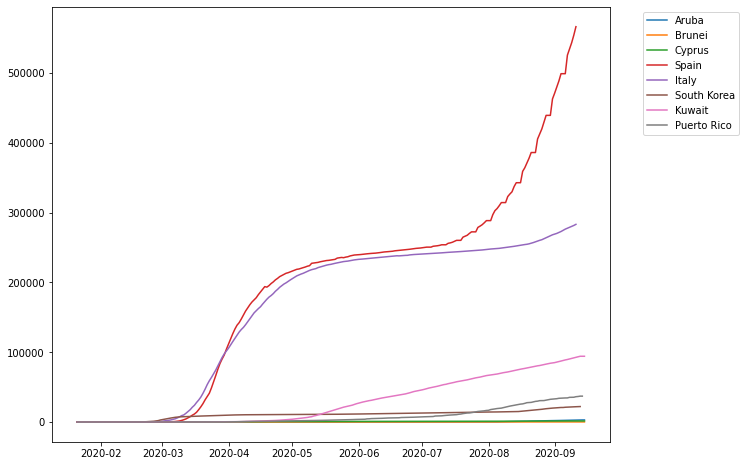

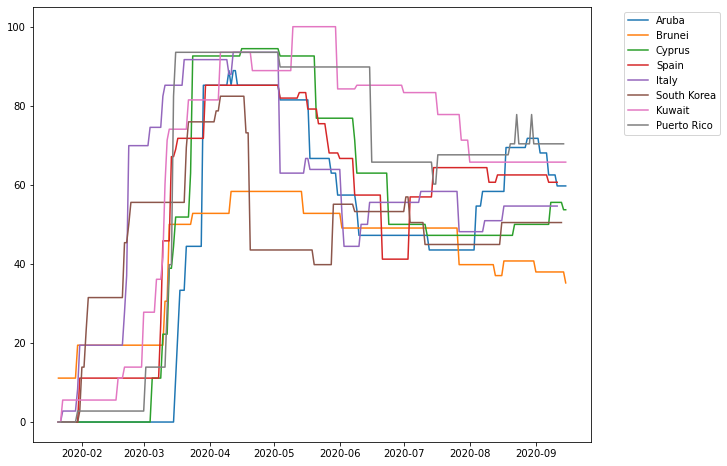

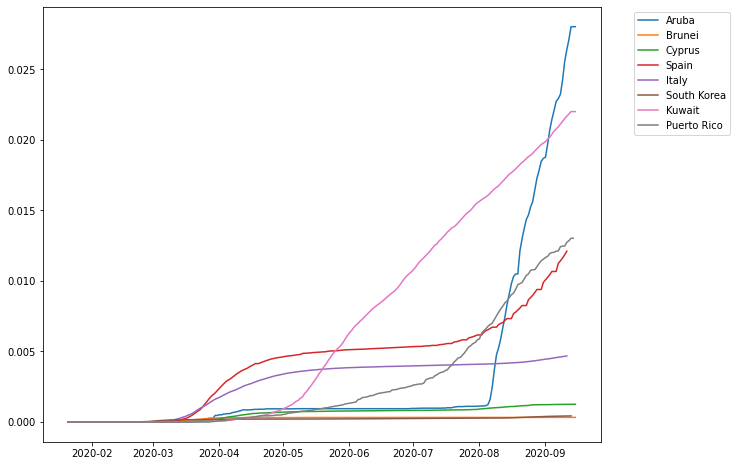

In [ ]:
plot_cluster(cluster1, 'casos_confirmados')
plot_cluster(cluster1, 'stringency_index')
plot_cluster(cluster1, 'casos/populacao')

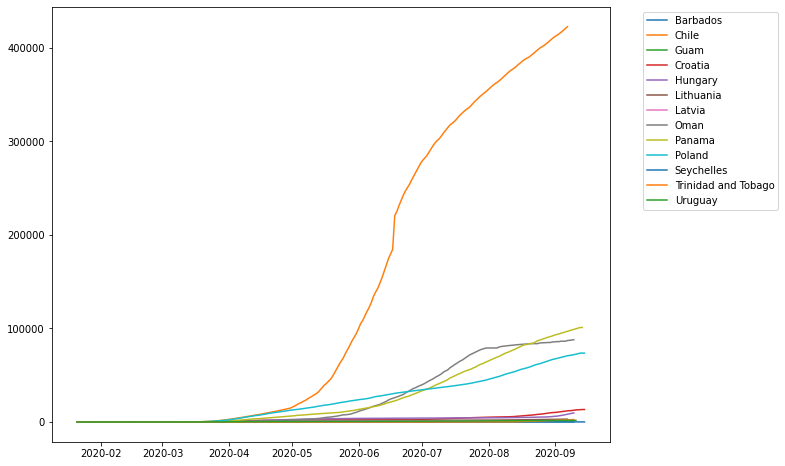

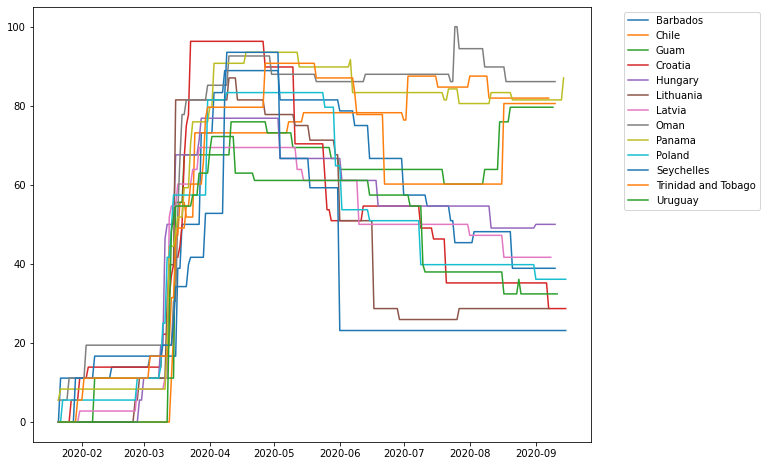

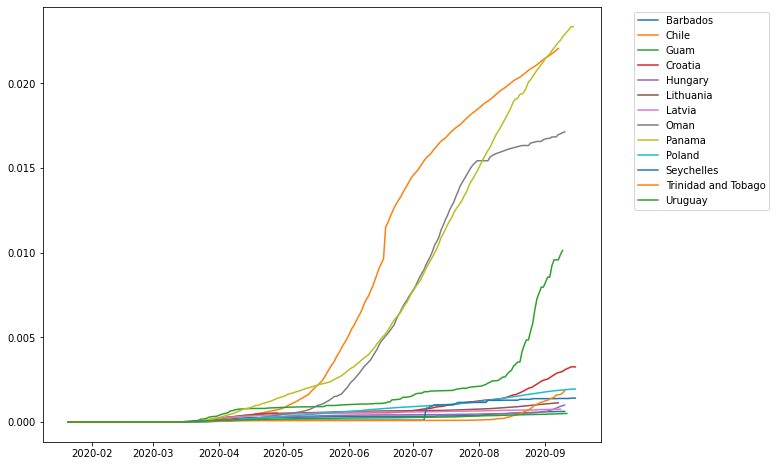

In [ ]:
plot_cluster(cluster2, 'casos_confirmados')
plot_cluster(cluster2, 'stringency_index')
plot_cluster(cluster2, 'casos/populacao')

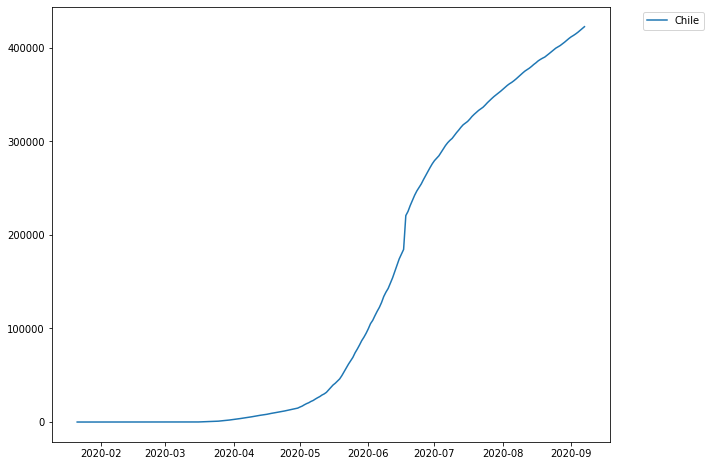

In [ ]:
plt.figure(figsize=(10,8))
pais_df = cluster2[cluster2['país'] == 'Chile']
plt.plot(pais_df['date'], pais_df['casos_confirmados'], label='Chile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

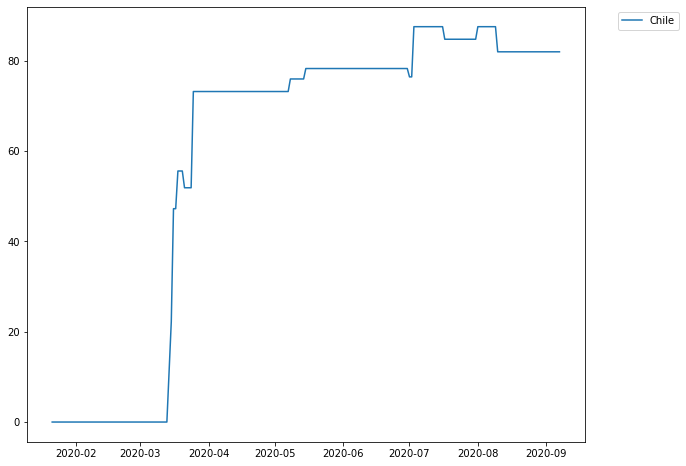

In [ ]:
plt.figure(figsize=(10,8))
pais_df = cluster2[cluster2['país'] == 'Chile']
plt.plot(pais_df['date'], pais_df['stringency_index'], label='Chile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

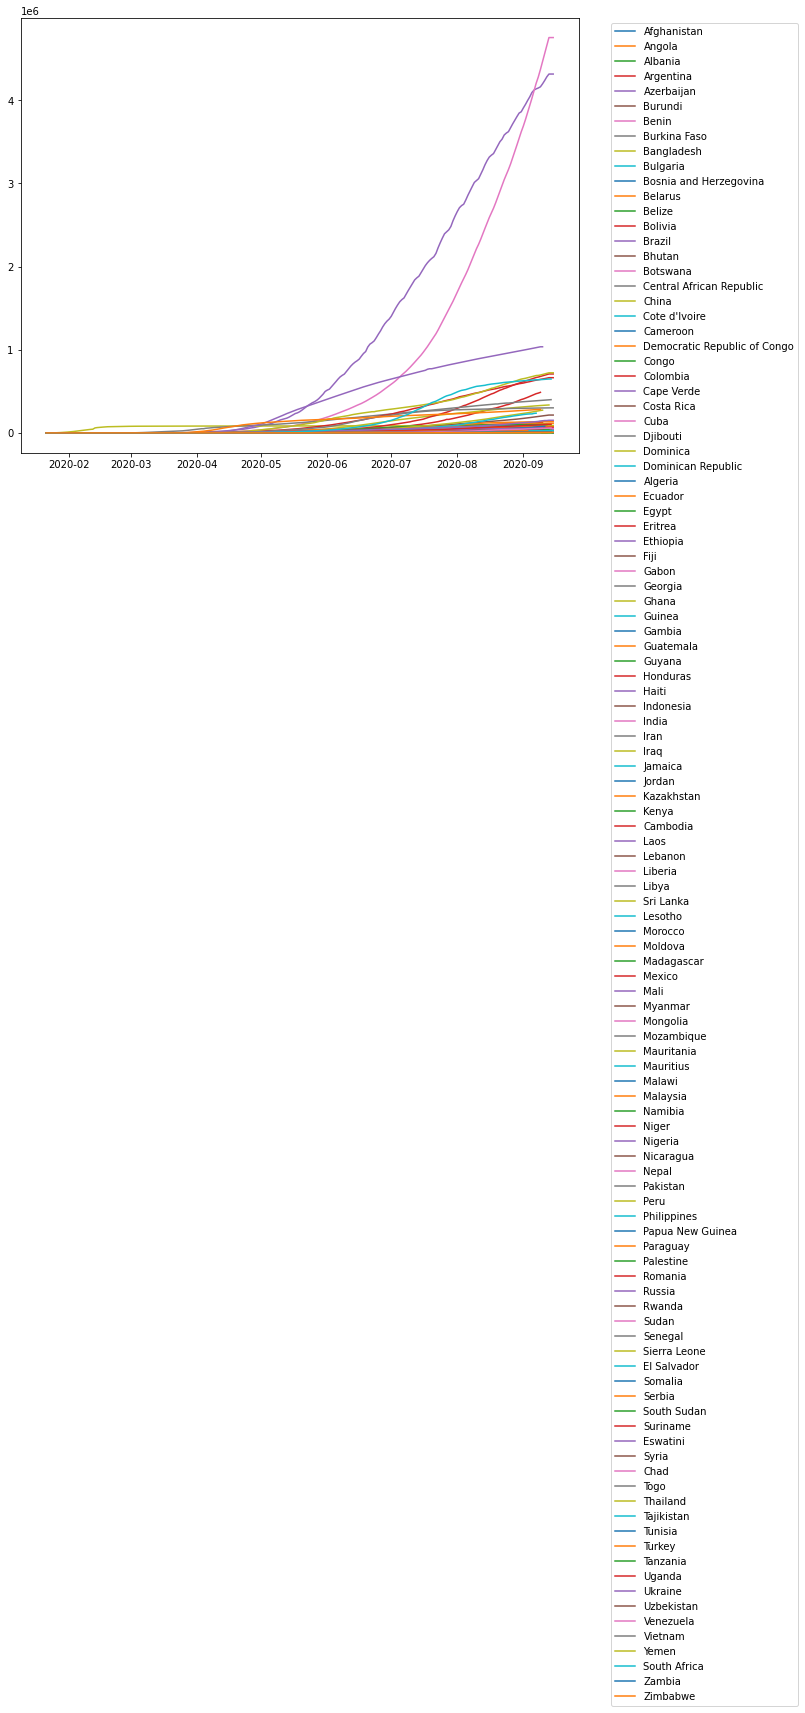

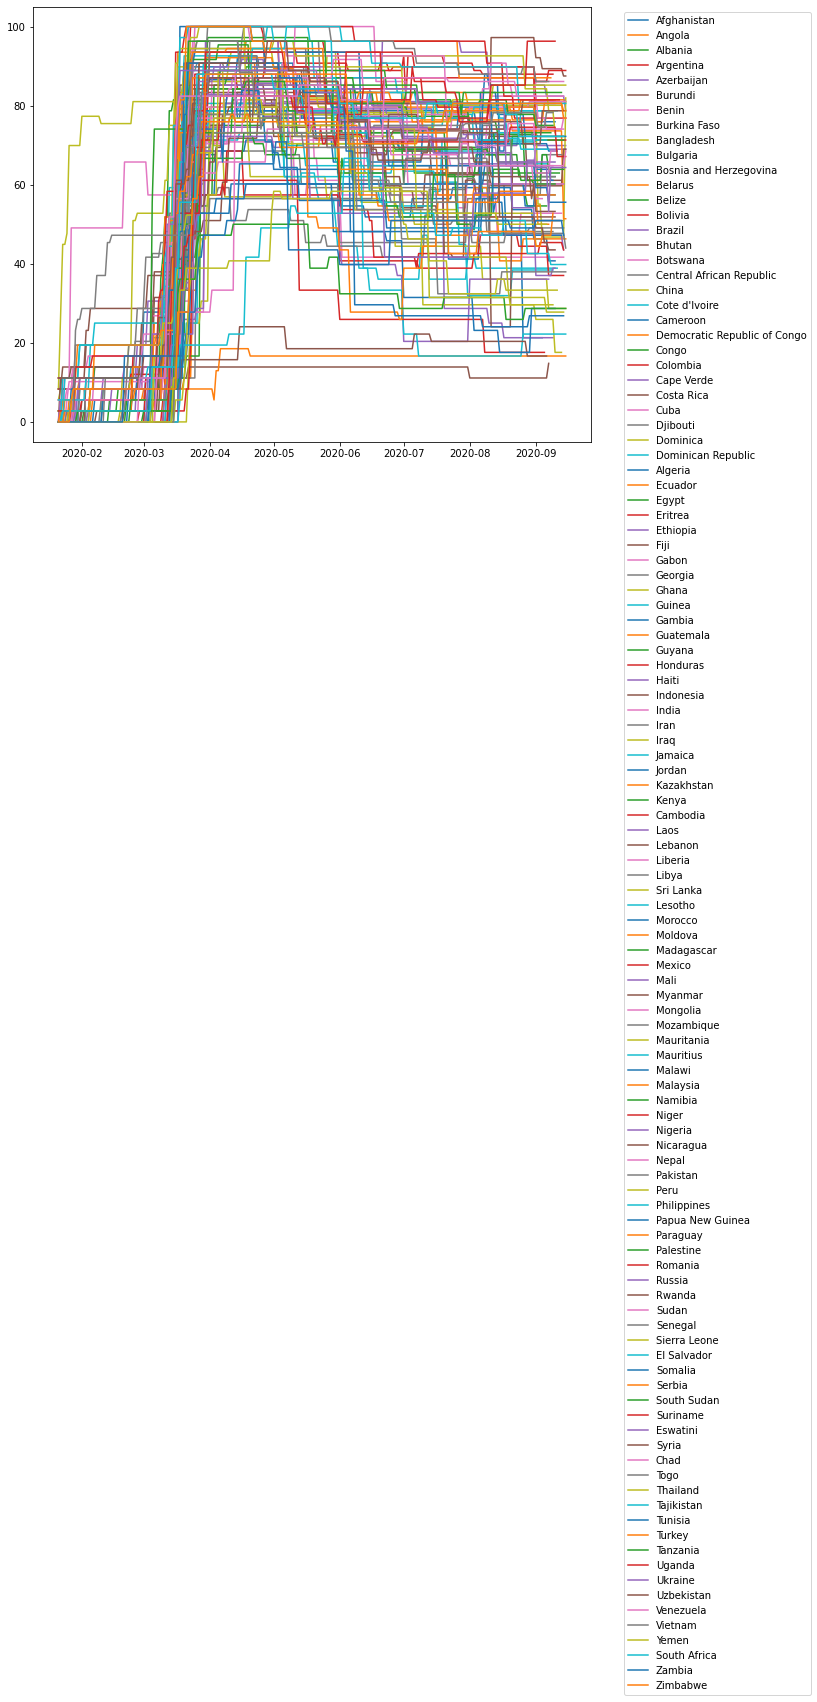

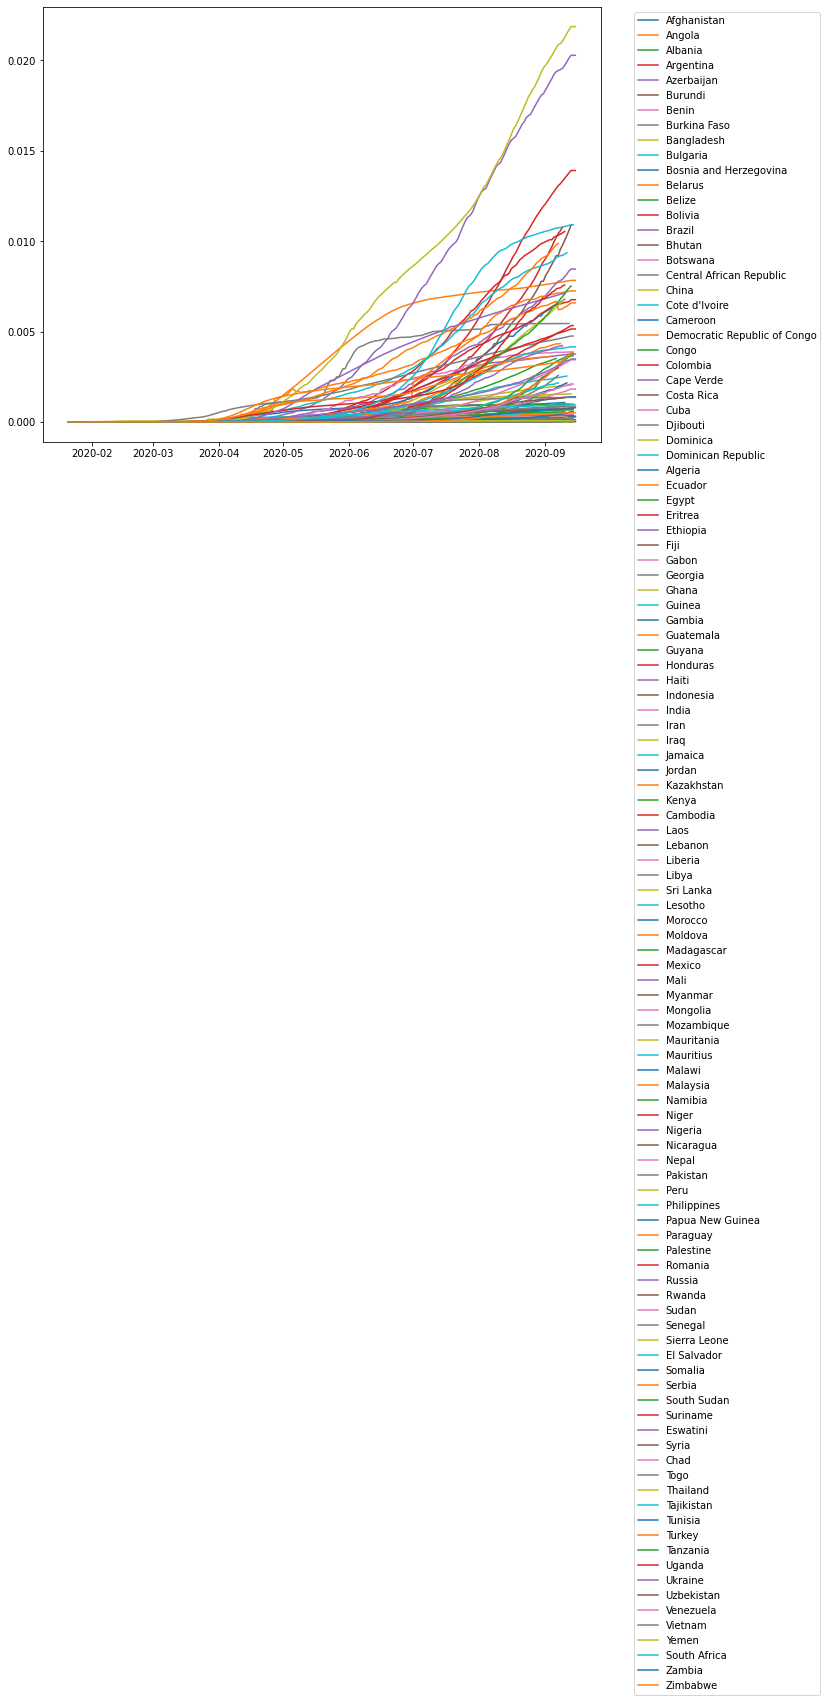

In [ ]:
plot_cluster(cluster3, 'casos_confirmados')
plot_cluster(cluster3, 'stringency_index')
plot_cluster(cluster3, 'casos/populacao')

**MAPA MUNDI**

In [ ]:
import folium
import json

with open('world-countries.json') as handle:
  country_geo = json.loads(handle.read())

m = folium.Map(location = [0,0],
               zoom_start=1)

# cor_por_cluster = [cor0, cor1, cor2, ..., clusterk]

def add_cluster_to_map(cluster, cor, mapa):
  countries = cluster['país'].unique()
  for country_name in countries:
    country = None
    for i in country_geo['features']:
      if i['properties']['name'] == country_name:
        country = i
        break
    if country is not None:
      folium.GeoJson(country,
        name=country_name,
        style_function=lambda x: {
          'fillColor':
            # cor_por_cluster[cluster_do_pais[country_name]]
            cor,
          'color': cor
        }).add_to(mapa)
    else:
      print(country_name)

add_cluster_to_map(cluster0, '#0C24FB', m)
add_cluster_to_map(cluster1, '#FC0D1A', m)
add_cluster_to_map(cluster2, '#0E7F12', m)
add_cluster_to_map(cluster3, '#FDA429', m)

folium.LayerControl().add_to(m)

m

FileNotFoundError: ignored